# Estymatory największej wiarygodności

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Przykład 
Program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [44]:
# Parametry rozkładu jednostajnego
a, b = -2, 4  # zakładamy, że chcemy losować z przedziału [-2, 4]

# Parametry rozkładu normalnego
mu, sigma = 1, 1

# Liczba próbek
N = 10000

# Losowanie próbki z rozkładu jednostajnego
uniform_data = np.random.uniform(a, b, N)

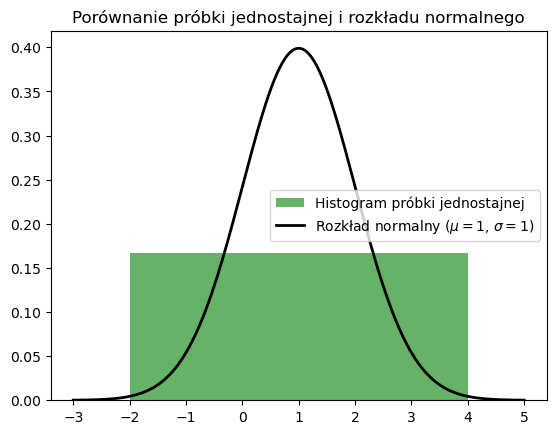

In [45]:
# Punkty, dla których będziemy rysować funkcję gęstości rozkładu normalnego
t = np.linspace(-3, 5, 1000)

# Rysowanie histogramu próbki z rozkładu jednostajnego
plt.hist(uniform_data, bins=1, density=True, alpha=0.6, color='g', label='Histogram próbki jednostajnej')

# Rysowanie funkcji gęstości rozkładu normalnego
plt.plot(t, stats.norm.pdf(t, mu, sigma), 'k-', lw=2, label='Rozkład normalny ($\mu=1$, $\sigma=1$)')

# Dodanie legendy i tytułu
plt.legend()
plt.title('Porównanie próbki jednostajnej i rozkładu normalnego')
plt.show()

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

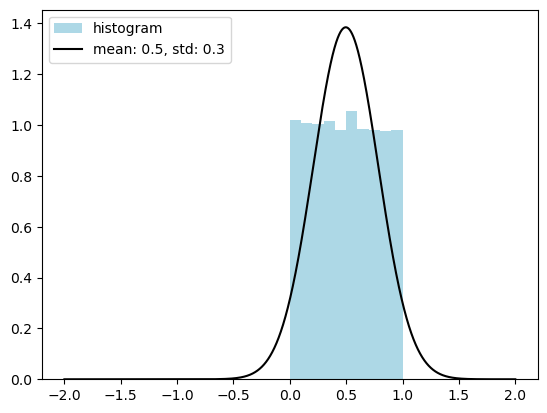

In [61]:
x = np.random.rand(10000)
mean = x.mean()
std = x.std()

data = np.linspace(-2,2,10000)
y = stats.norm.pdf(data,mean,std)

plt.hist(x,density=True,color='lightblue',label='histogram')
plt.plot(data,y,color='black',label=f'mean: {round(mean,1)}, std: {round(std,1)}')
plt.legend()

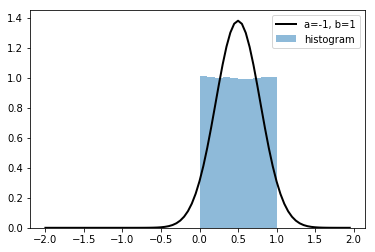

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

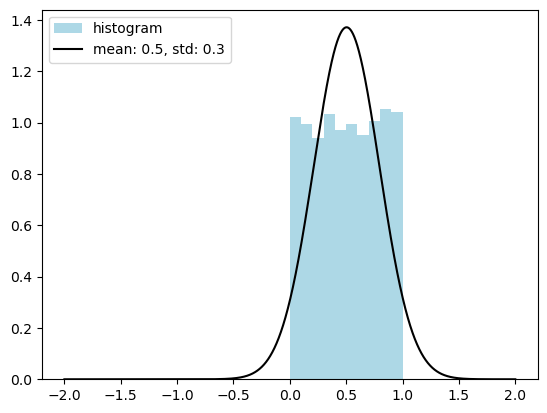

In [76]:
data = stats.uniform().rvs(10000)
mean, std = stats.norm.fit(data)

x = np.linspace(-2,2,10000)
y = stats.norm.pdf(x,mean,std)

plt.hist(data,density=True,color='lightblue',label='histogram')
plt.plot(x,y,color='black',label=f'mean: {round(mean,1)}, std: {round(std,1)}')
plt.legend()

# Zadanie 3

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [77]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))

In [79]:
def MLE(data,mu,sigma):
    return sum(np.log(Gpdf(x,mu,sigma)) for x in data)

# Zadanie 4
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [103]:
X = np.random.rand(10000)
print(MLE(X,0,1))
print(MLE(X,0,2))
print(MLE(X,1,1))
print(MLE(X,.5,.3))

-10840.319680586957
-16533.590724781236
-10873.863385928234
-1790.8373022410808


# Przykład
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [104]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3
[-1.00000001e+00 -7.45058060e-09]


# Zadanie 5
Zminimalizuj funkcję wiarygodności korzystając z optimize (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

In [264]:
def MLEv2(x, data):
    mu, sigma = x
    return -sum(np.log(Gpdf(x,mu,abs(sigma))) for x in data)

In [159]:
X = np.random.rand(10000)
optimize.fmin_cg(MLEv2, np.array([0,1]), args=(X,))

         Current function value: 1648.879437
         Iterations: 9
         Function evaluations: 146
         Gradient evaluations: 45


array([0.49881335, 0.28534662])

# Zadanie 6
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

In [197]:
def splitGaussian(x,mu,std,tau):
    c = np.sqrt(2/np.pi) * std**-1 * (1+tau)**-1
    if x <= mu:
        return c * np.e ** ( -1/(2*std**2) * (x-mu)**2 )
    else:
        return c * np.e ** ( -1/(2*std**2 *tau**2) * (x-mu)**2 )

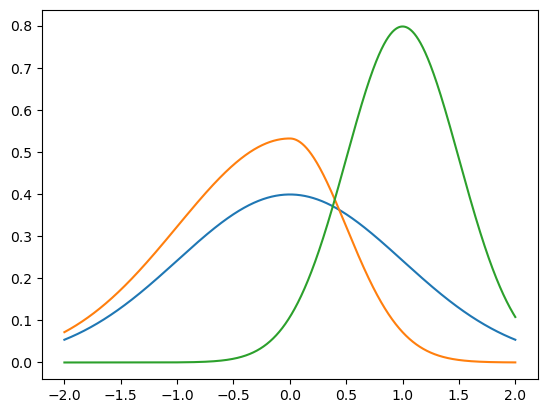

In [198]:
X = np.linspace(-2,2,10000)
Y1 = np.array([splitGaussian(x,0,1,1) for x in X])
Y2 = np.array([splitGaussian(x,0,1,1/2) for x in X])
Y3 = np.array([splitGaussian(x,1,1/2,1) for x in X])
plt.plot(X,Y1)
plt.plot(X,Y2)
plt.plot(X,Y3)

# Zadanie 7

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [196]:
def MLEv3(x,data):
    mu,sigma,tau = x
    return -sum(np.log(splitGaussian(x,mu,abs(sigma),abs(tau)))for x in data)

# Zadanie 8
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [191]:
X = np.random.rand(10000)
optimize.fmin_cg(MLEv3, np.array([0,1,1]), args=(X,))

         Current function value: 1710.068478
         Iterations: 63
         Function evaluations: 732
         Gradient evaluations: 180


array([0.46772659, 0.2676866 , 1.14503074])

# Zadanie 9
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>california_housing.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [192]:
from sklearn import datasets
california_housing = datasets.fetch_california_housing()
data=california_housing.data[:,7]

In [252]:
x

(-119.56970445736432, 2.003483187746976)

In [253]:
x = stats.norm.fit(data)
mu = np.mean(data)
sigma = np.std(data)
tau = np.std(data)

In [263]:
normal = optimize.fmin_cg(MLEv2, np.array([mu,sigma]), args=(data,))
split_normal = optimize.fmin_cg(MLEv3, np.array([mu,sigma,tau]), args=(data,))

-119.56970445736432
-119.56970444246316
-119.56970445736432
-119.56042711361432
-119.56042709871316
-119.56042711361432
-119.56970356968353
-119.56970355478236
-119.56970356968353
-119.56970432118682
-119.56970430628566
-119.56970432118682
-119.56970439444673
-119.56970437954557
-119.56970439444673
-119.56970442719492
-119.56970441229376
-119.56970442719492
-119.56970445034139
-119.56970443544023
-119.56970445034139
-119.5697044439105
-119.56970442900933
-119.5697044439105
-119.56970444751059
-119.56970443260943
-119.56970444751059
-119.56970444464407
-119.56970442974291
-119.56970444464407
-119.56970444392626
-119.5697044290251
-119.56970444392626
-119.56970444391051
-119.56970442900935
-119.56970444391051
-119.5697044439105
-119.56970442900933
-119.5697044439105
-119.5697044439105
-119.56970442900933
-119.5697044439105
-119.5697044439105
-119.56970442900933
-119.5697044439105
-119.5697044439105
-119.56970442900933
-119.5697044439105
-119.5697044439105
-119.56970442900933
-119.5697044

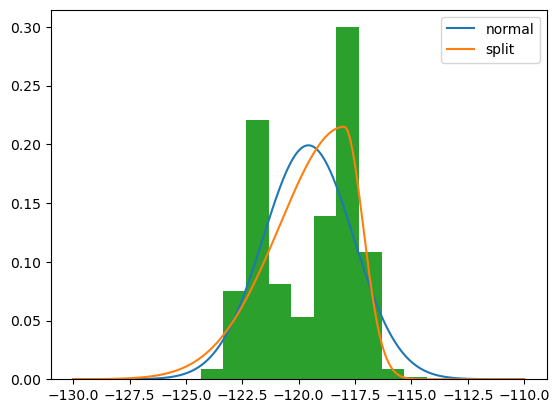

In [273]:
x = np.linspace(-130,-110,10000)
plt.plot(x, Gpdf(x,normal[0],normal[1]),label='normal')
plt.plot(x, [splitGaussian(x,split_normal[0],split_normal[1],split_normal[2]) for x in x], label='split')
plt.hist(data,density=True)
plt.legend()